In [ ]:
# Sử dụng các thư viện sau để train mô hình
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

In [ ]:
# Chuyển đến file Google Drive chứa file dữ liệu csv đã tạo sẵn và tải lên Drive
%cd"/content/drive/MyDrive/Colab Notebooks/BT_AI/ROBOT 2 BAC/"

/content/drive/MyDrive/Colab Notebooks/BT_AI/ROBOT 2 BAC


In [ ]:
# Đọc file dữ liệu đã tạo sẵn và tải lên Drive
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BT_AI/ROBOT 2 BAC/ROBOT_2_BAC.csv")
data.head()

,theta1,theta2,px,py
0,0.0,0.0,90.000000,0.000000
1,0.0,1.0,89.993908,0.698096
2,0.0,2.0,89.975633,1.395980
3,0.0,3.0,89.945181,2.093438
4,0.0,4.0,89.902562,2.790259


In [ ]:
# Cắt 2 cột theta1 và theta2 để tạo ra x (input) cho mô hình
x=data.drop(['theta1','theta2'],axis=1)
print(x.shape)
x

(28800, 2)


,px,py
0,90.000000,0.000000
1,89.993908,0.698096
2,89.975633,1.395980
3,89.945181,2.093438
4,89.902562,2.790259
...,...,...
28795,-14.040623,-16.662226
28796,-13.740073,-16.032110
28797,-13.450566,-15.396845
28798,-13.172191,-14.756625


In [ ]:
# Các cột còn lại trong dữ liệu là y (output) cho mô hình
y=data[['theta1','theta2']]
print(y.shape)
y

(28800, 2)


,theta1,theta2
0,0.0,0.0
1,0.0,1.0
2,0.0,2.0
3,0.0,3.0
4,0.0,4.0
...,...,...
28795,179.0,155.0
28796,179.0,156.0
28797,179.0,157.0
28798,179.0,158.0


In [ ]:
# Cắt phần dữ liệu x, y đã tạo ra 2 phần với phần training là 70% và test là 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
# Xem số hàng và số cột của dữ liệu train và test sau khi cắt
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17280, 2)
(17280, 2)
(11520, 2)
(11520, 2)


In [ ]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 2 tín hiệu vào và có 128 tín hiệu ra sử dụng hàm relu
model.add(Dense(128,activation='relu',input_shape=(2,)))
# Tạo lớp ẩn thứ hai với 128 tín hiệu vào và có 64 tín hiệu ra sử dụng hàm relu
model.add(Dense(64,activation='relu'))
# Tạo lớp ẩn thứ ba với 64 tín hiệu vào và có 32 tín hiệu ra sử dụng hàm relu
model.add(Dense(32,activation='relu'))
# Tạo lớp ẩn thứ tư với 32 tín hiệu vào và có 16 tín hiệu ra sử dụng hàm relu
model.add(Dense(16,activation='relu'))
# Tạo lớp ẩn thứ tư với 16 tín hiệu vào và có 8 tín hiệu ra sử dụng hàm relu
model.add(Dense(8,activation='relu'))
# Tạo lớp ẩn thứ năm với 8 tín hiệu vào và có 2 tín hiệu ra sử dụng hàm linear
model.add(Dense(2,activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 11,402
Trainable params: 11,402
Non-traina

In [ ]:
# Biên dịch mô hình
model.compile(loss='mse',optimizer='adam',metrics='mae')
#Train mô hình với 500 lần học (epochs), mỗi lần học 100 dữ liệu (batch_size), khi sai số không thay đổi trong 40 lần học thì sẽ␣ dừng việc train
history= model.fit(x_train, y_train, batch_size=100, epochs=500, verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=40)])


Epoch 1/500
139/139 [==============================] - 1s 4ms/step - loss: 4023.2393 - mae: 47.1818 - val_loss: 2336.4568 - val_mae: 33.8912
Epoch 2/500
139/139 [==============================] - 0s 3ms/step - loss: 2398.8042 - mae: 34.6211 - val_loss: 2245.8186 - val_mae: 33.0663
Epoch 3/500
139/139 [==============================] - 0s 3ms/step - loss: 2319.6494 - mae: 34.0284 - val_loss: 2166.5488 - val_mae: 33.0666
Epoch 4/500
139/139 [==============================] - 0s 3ms/step - loss: 2106.4329 - mae: 32.4850 - val_loss: 1696.7024 - val_mae: 29.8836
Epoch 5/500
139/139 [==============================] - 0s 3ms/step - loss: 781.9120 - mae: 20.1578 - val_loss: 216.3804 - val_mae: 11.6276
Epoch 6/500
139/139 [==============================] - 0s 3ms/step - loss: 143.6519 - mae: 9.1206 - val_loss: 95.2201 - val_mae: 7.4103
Epoch 7/500
139/139 [==============================] - 0s 3ms/step - loss: 81.2417 - mae: 6.7898 - val_loss: 50.1545 - val_mae: 5.2616
Epoch 8/500
139/139 [=====

In [ ]:
# Vẽ đồ thị giữa Epochs và Mean absolute error
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test mean absolute error', Score[1])

Test Loss 4.075204849243164
Test mean absolute error 1.1573188304901123


<function matplotlib.pyplot.show>

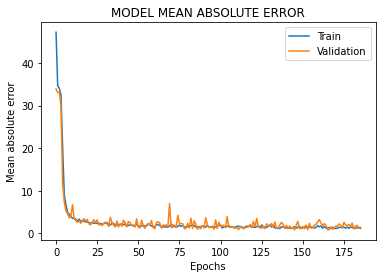

In [ ]:
# Dự doán bộ dữ liệu test và xem sai số giữa đầu ra của dữ liệu train và test
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Dự doán bộ dữ liệu test và xem sai lệch giữa đầu ra của dữ liệu train và test
y_pred=model.predict(x_test)
y_test=np.array(y_test)
print("Giá trị dự đoán:",y_pred[20])
print("Giá trị thực:",y_test[20])

Predicted values are: [170.22089   96.659134]
Real values are: [170.  96.]


In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ROBOT 2DOF.ipynb')